In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dataset=pd.read_csv("Spam SMS Collection", sep='\t', names=['label','message'])
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
dataset.shape

(5572, 2)

In [107]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [108]:
dataset.isnull().sum()

label      0
message    0
dtype: int64

**No Null value Present**

In [109]:
dataset["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


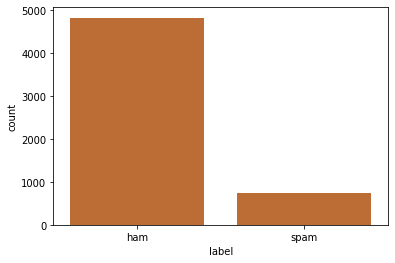

In [110]:
sns.countplot(dataset['label'],color='chocolate')

**From above we can see its a imbalanced dataset. So we have to perform upsampling/downsampling.**

**If we replicate spam rows in a amount to get same number of rows majority class have, we will get out of this issue i.e (4825/747)=~7 so 747*7= roughly 5000 rows**

In [111]:
df_spam=dataset[dataset['label']=='spam']
df_spam.head()

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [112]:
df_spam.shape

(747, 2)

In [113]:
ham_rows=dataset.shape[0]-df_spam.shape[0]
ratio=int(ham_rows/df_spam.shape[0])
df_spam=pd.concat([df_spam]*(ratio-1))
dataset=pd.concat([dataset,df_spam])
dataset['label'].value_counts()

ham     4825
spam    4482
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


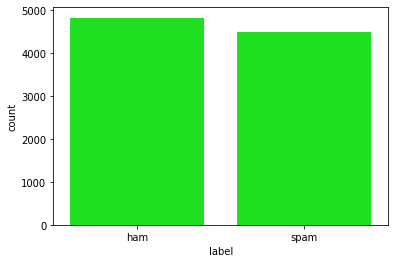

In [114]:
sns.countplot(dataset['label'],color='lime')

**Data is Balanced now**

In [115]:
def convertlabel(x):
  if x=='spam':
    return 1
  else:
    return 0

In [116]:
dataset['label']=dataset['label'].apply(lambda x : convertlabel(x))
dataset.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Feature Engineering: we can fetch some features from message like word count, integer present, special character present**

In [117]:
#For Finding special charcters in message
def isSpecialCharPresent(message):
  special_characters=['~','!','@','#','$','%','^','&','*','(',')','+','£','€','¥']
  for item in special_characters:
    if item in message:
      return 1

  return 0

# For Finding Digits in message

def isDigitPresent(message):
  words=[word for word in message]
  for character in words:
    if character.isdigit():
      return 1
  return 0

In [118]:
dataset['wordcount']=dataset['message'].apply(lambda message : len(message.split()))
dataset['special_char_present']=dataset['message'].apply(lambda message : isSpecialCharPresent(message))
dataset['DigitPresent']=dataset['message'].apply(lambda message: isDigitPresent(message))
dataset.head()

,label,message,wordcount,special_char_present,DigitPresent
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,1,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


**Now we have to analyze the newly added columns how they are contributing to spam or ham category**

In [119]:
dataset.shape

(9307, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


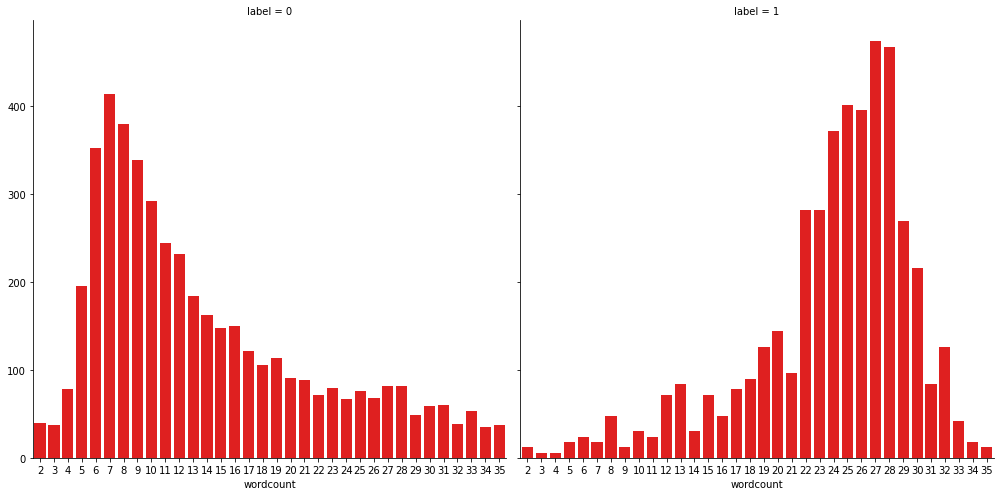

In [120]:
x=sns.FacetGrid(col='label',data=dataset,size=7)
#x=x.map(sns.distplot,'wordcount',color='r')
x=x.map(sns.countplot,'wordcount',color='r')

**Analysis: For the messages which are not spam, most of the word count lies in 6-13 whereas for spam messages its lies between 22-30**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


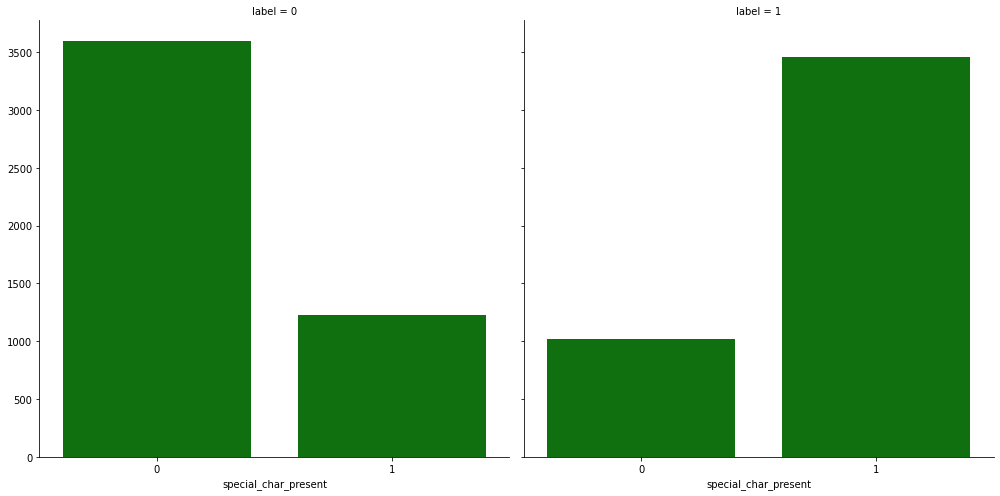

In [121]:
x=sns.FacetGrid(col='label', data=dataset,size=7)
x=x.map(sns.countplot,'special_char_present',color='g')

**Analysis: Special Characters are present in most of the spam messages**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


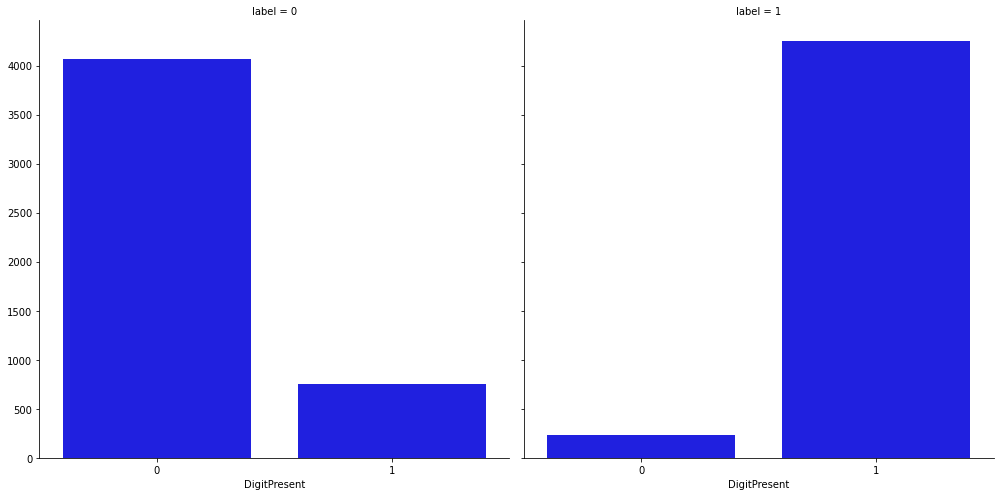

In [122]:
x=sns.FacetGrid(col='label',data=dataset, size=7)
x=x.map(sns.countplot,'DigitPresent', color='b')

**Analysis: Numbers are present in most of the spam messages**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


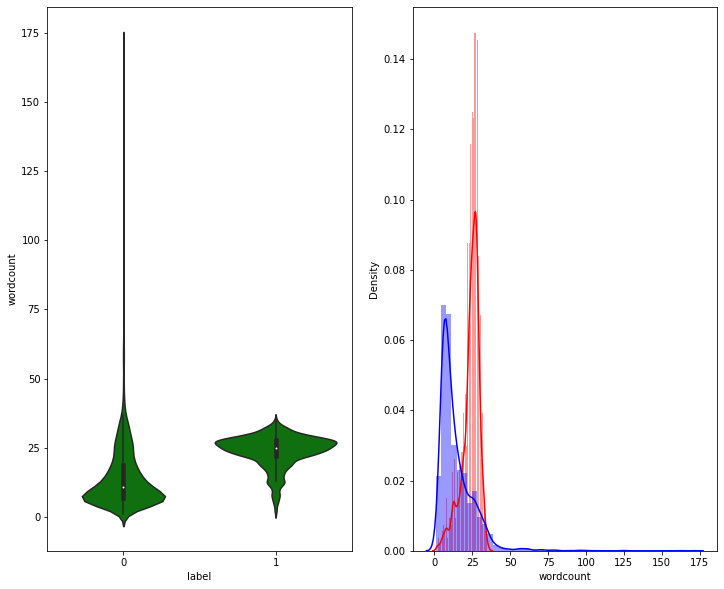

In [123]:
plt.figure(figsize=(12, 10))

plt.subplot(1,2,1)
sns.violinplot(x = 'label', y = 'wordcount', data =dataset,color='g')

plt.subplot(1,2,2)
sns.distplot(dataset[dataset['label'] == 1]['wordcount'], color = 'red')
sns.distplot(dataset[dataset['label'] == 0]['wordcount'], color = 'blue' )
plt.show()

**50 percentile lies around word count 10 in ham messages whereas it lies around 25 in spam messages**

**Some part of Distribution are overlapping when word count is low**

In [124]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [125]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

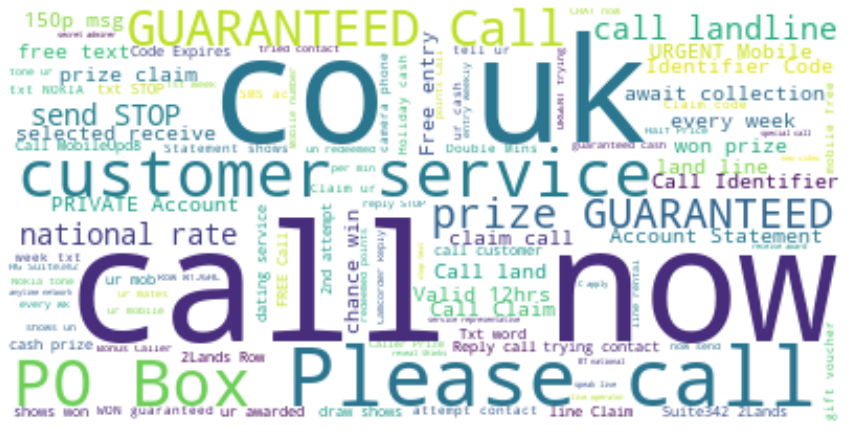

In [129]:
from wordcloud import WordCloud
message_spam=' '.join(list(dataset[dataset['label'] == 1]['message']))
plt.figure(figsize=(15,15))
wc=WordCloud(background_color="white", max_words=100)
wc.generate(message_spam)
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

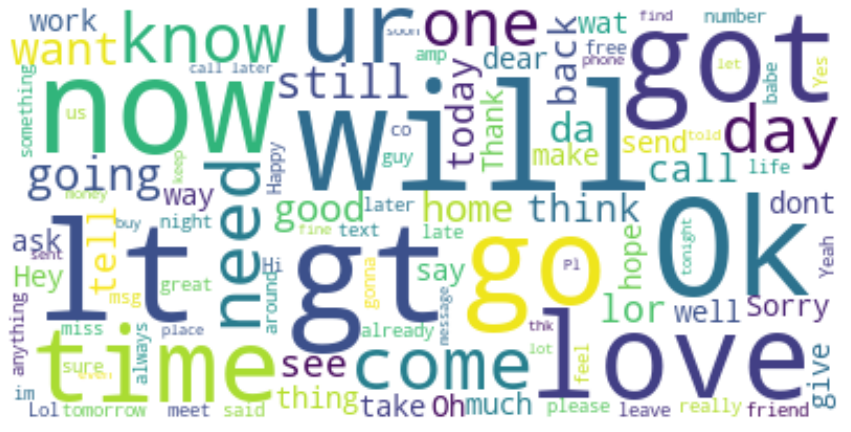

In [131]:
from wordcloud import WordCloud
message_ham=' '.join(list(dataset[dataset['label'] == 0]['message']))
plt.figure(figsize=(15,15))
wc=WordCloud(background_color="white", max_words=100)
wc.generate(message_ham)
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

**From Above Observation we can see spam contains more words like call, now, service, guaranteed whereas ham messages contains usual English words**

In [83]:
def preprocessing(message):
  stemmer=PorterStemmer()
  message = re.sub(pattern='[^a-zA-Z]', repl=' ',string=message)
  message = message.lower()
  words = [stemmer.stem(word) for word in message.split() if word not in stopwords.words('english')]
  message=' '.join(words)
  return message


In [84]:
dataset['message']=dataset['message'].apply(lambda message: preprocessing(message))
dataset.head()

,label,message,wordcount,special_char_present,DigitPresent
0,0,go jurong point crazi avail bugi n great world...,20,0,0
1,0,ok lar joke wif u oni,6,0,0
2,1,free entri wkli comp win fa cup final tkt st m...,28,1,1
3,0,u dun say earli hor u c alreadi say,11,0,0
4,0,nah think goe usf live around though,13,0,0


In [86]:
dataset.shape

(9307, 5)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
Vectors=tfidf.fit_transform(list(dataset['message'])).toarray()
print(Vectors.shape)

(9307, 500)


**Applyig Principal Component Analysis to reduce the dimension of dataset so as to remove unimportant features**

In [89]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=60
pca_data=pca.fit_transform(Vectors)

**Converting Text message to vectors using TFIDFVectorizer and concatenating with Actual Dataset**

In [90]:
Temp_Dataset=pd.DataFrame(pca_data.tolist(),index=dataset.index)
Final_Dataset=pd.concat([dataset,Temp_Dataset],axis=1)
Final_Dataset=Final_Dataset.drop(['message'],axis=1)
Final_Dataset.head()

,label,wordcount,special_char_present,DigitPresent,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0,20,0,0,-0.110095,-0.097049,-0.013641,0.073393,-0.060931,-0.024392,0.040777,0.040456,-0.143435,0.164412,0.012075,0.101093,-0.059112,0.009279,-0.022052,0.016905,-0.028554,-0.026094,0.001436,-0.048695,-0.006393,0.047379,-0.009009,0.005551,-0.046206,-0.031082,0.102816,0.010873,0.047288,-0.070713,0.121176,-0.013374,0.100492,-0.001586,-0.004012,-0.113750,0.084330,0.058566,-0.022481,0.047719,0.054389,0.000042,0.112695,-0.076875,0.032418,-0.009188,0.015687,0.007424,0.087320,-0.023700,-0.036543,0.095325,0.048345,-0.081168,0.001397,0.093284,-0.064751,0.105356,-0.118126,0.113857
1,0,6,0,0,-0.150649,-0.158120,-0.044260,0.132073,-0.504034,0.457405,0.139663,-0.084933,0.610887,-0.033242,0.049146,0.046751,-0.061893,-0.009739,0.046251,0.016243,-0.056482,0.014724,-0.027431,0.031324,0.003846,-0.061656,-0.008579,0.000491,-0.008284,0.021136,0.010026,0.030462,0.007617,0.045716,0.014899,-0.012515,0.032185,0.004649,0.034786,0.033037,0.023802,0.026699,0.044362,-0.041913,0.042501,-0.001165,-0.041118,-0.036018,-0.018827,0.016496,-0.022834,0.000748,-0.006314,0.004130,-0.018061,0.012191,-0.012852,-0.016595,-0.022676,0.001137,-0.016219,0.025237,-0.022746,-0.023072
2,1,28,1,1,-0.015922,0.193081,0.132130,0.033017,0.015410,0.012823,-0.011013,0.043619,0.055159,0.055646,-0.160592,0.020011,0.083565,-0.021890,0.001345,-0.118566,0.141470,0.016700,-0.157670,0.079240,-0.025016,0.008024,0.075257,0.037231,-0.043743,0.083518,0.052446,0.022173,0.140698,0.053695,-0.112840,0.074234,0.001400,-0.079059,0.124543,-0.056050,0.003452,-0.062242,-0.017959,0.136029,0.025873,-0.016064,-0.027640,-0.151125,-0.097698,-0.094400,-0.029945,0.032301,-0.072412,0.069658,-0.140701,-0.034641,0.062263,0.025511,0.056475,-0.027850,0.036653,-0.008286,0.040400,-0.043370
3,0,11,0,0,-0.086596,-0.080584,-0.010217,0.003691,-0.010023,0.006408,0.007950,0.000958,-0.024115,-0.007351,-0.025297,-0.013134,-0.001353,0.017914,-0.006597,-0.034899,-0.029716,-0.028663,-0.000648,-0.027444,0.004123,0.040064,0.008630,0.043322,-0.003187,-0.088771,-0.005941,-0.027820,-0.006444,-0.004109,0.013394,0.035060,0.001910,-0.007207,-0.059129,-0.023807,-0.001757,-0.019465,-0.009144,0.020719,0.035041,-0.004876,0.052243,0.088773,0.041422,-0.043391,0.035225,-0.008006,-0.108414,0.063609,-0.041266,-0.019128,0.017731,0.018336,-0.020742,0.025448,-0.037786,-0.027531,0.081181,0.009797
4,0,13,0,0,-0.063280,-0.078588,-0.003092,-0.015036,0.021779,-0.022038,-0.046957,0.050642,-0.000650,-0.066349,0.021150,0.044648,0.021231,0.024731,-0.104312,0.023846,0.036051,0.065400,-0.061392,-0.072094,-0.024372,-0.016183,-0.004517,0.050088,-0.103336,-0.048125,-0.025745,-0.023332,0.043563,0.064339,-0.116346,-0.023920,0.043195,0.023776,0.049876,-0.040223,0.013694,0.099869,0.020978,-0.063941,0.041757,-0.093460,0.015543,0.066080,0.088833,0.020066,-0.053645,0.074173,-0.007477,0.035400,0.023558,-0.102609,0.037467,-0.078160,0.059121,0.069619,-0.075011,0.077291,0.000814,-0.048712


In [91]:
import pickle
pickle.dump(tfidf, open('tfidf_transform.pkl', 'wb'))

In [92]:
X=Final_Dataset.iloc[:,1:]
y=Final_Dataset['label']

from sklearn.model_selection import train_test_split

##Spliting train and test data with 30% test size
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [93]:
X.shape

(9307, 63)

**Training Model with Random Forest Classifier, a Bagging Technique with Random Search CV with different parameter to avoid OverFitting and to get the best parameter for model**

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier()
import numpy as np

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
criterion=['gini','entropy']
max_depth=[1,2,5,10,20]
min_samples_split=[2,3,4]
max_features=['sqrt','log2']

param={'n_estimators':n_estimators,
       'criterion':criterion,
       'max_depth':max_depth,
       'min_samples_split':min_samples_split,
       'max_features':max_features
       }

rf_random=RandomizedSearchCV(estimator=rf, param_distributions=param, n_iter=20, scoring='f1',cv=5,verbose=0)
rf_random.fit(X_train, y_train)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [95]:
rf_random.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 400}

In [96]:
prediction=rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


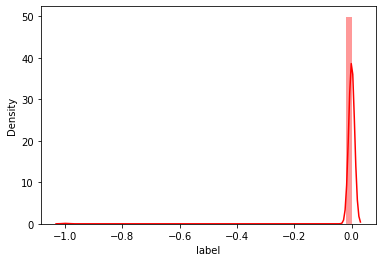

In [97]:
sns.distplot(y_test-prediction,color='r')

In [98]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1439
           1       0.99      1.00      1.00      1354

    accuracy                           1.00      2793
   macro avg       1.00      1.00      1.00      2793
weighted avg       1.00      1.00      1.00      2793



Text(0.5, 1.0, 'Confusion Matrix')

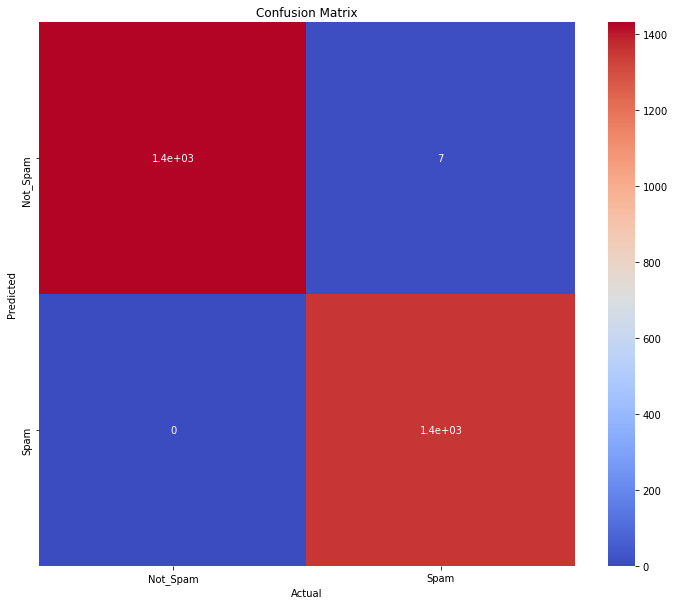

In [99]:

plt.figure(figsize=(12,10))
sns.heatmap(data=confusion_matrix(y_test,prediction),annot=True,cmap="coolwarm",xticklabels=['Not_Spam', 'Spam'], yticklabels=['Not_Spam', 'Spam'] )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

In [27]:
import xgboost

xgb=xgboost.XGBClassifier()
#randomsearch=RandomizedSearchCV(estimator=xgb, param_distributions=param, n_iter=20, scoring='roc_auc',cv=5,verbose=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [28]:
predictionxgb=xgb.predict(X_test)

In [31]:
print(classification_report(y_test,predictionxgb))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1439
           1       0.96      0.96      0.96      1354

    accuracy                           0.96      2793
   macro avg       0.96      0.96      0.96      2793
weighted avg       0.96      0.96      0.96      2793



Text(0.5, 1.0, 'Confusion Matrix')

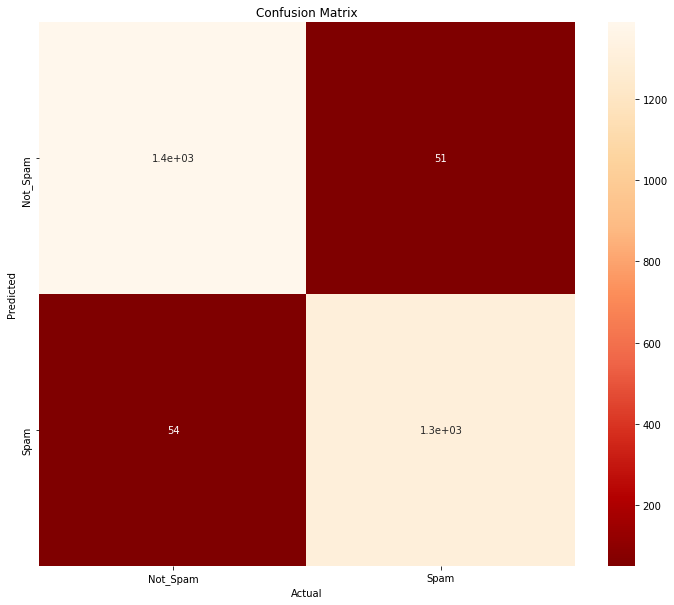

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(data=confusion_matrix(y_test,predictionxgb),annot=True,cmap="OrRd_r",xticklabels=['Not_Spam', 'Spam'], yticklabels=['Not_Spam', 'Spam'] )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

In [71]:
import pickle

pickle.dump(rf_random,open('spamclassifier.pkl','wb'))